In [1]:
import csv
from ast import literal_eval
import numpy as np
#import in library
import pandas as pd
df = pd.read_csv('covid_hospitalization_sample.csv',encoding="ISO-8859-1")
df.head()
from sklearn.model_selection import train_test_split



# Task 1: Preparation of data (2 marks)
1. What is the proportion of patients who are classified as COVID-19 positive? Would
you require a sampling technique on this data?

The perportion of tested positive is 558/(672+558)=45.37%


In [2]:
tested_cases=df[['SARS-Cov-2 exam result','Patient ID']].copy()
tested_cases.groupby('SARS-Cov-2 exam result').count()

,Patient ID
SARS-Cov-2 exam result,
negative,672
positive,558


## Sampling the data
# 3.What variables did you include in the analysis? justify the choice of input selection(input/target). 
The document states the hospital only interested in the impact of "regular blood
test" and "influenza rapid test" group variables.

In [3]:
#Create a subset of data that contain only the useful columns
sample_fixed=df[['Patient ID','Patient age quantile','Patient addmited to regular ward','Patient addmited to semi-intensive unit','Patient addmited to intensive care unit', 'Proteina C reativa', 'Neutrophils', 'Mean platelet volume',
'Monocytes', 'Red blood cell distribution width', 'Red blood Cells', 'Platelets',
'Eosinophils', 'Basophils', 'Leukocytes', 'Mean corpuscular hemoglobin', 'Mean corpuscular volume', 'Mean corpuscular hemoglobin concentration',
'Lymphocytes', 'Hemoglobin', 'Hematocrit','Influenza B rapid test', 'Influenza A rapid test']]
pd.options.display.max_columns=None
sample_fixed

,Patient ID,Patient age quantile,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
0,9abc76405794c6d,9,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative
1,01d324f278f3101,16,0,0,0,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,positive,negative
2,b2fb9312efbadc1,9,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative
3,eb5ef46a892698f,0,0,0,0,-0.342622,NaN,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,positive,negative
4,a713345aef928fa,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0716648a7fa58a6,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1226,0db34a7c845e57a,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1227,0ecac021e9c4511,17,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,25ab118504a09df,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative


## 2. Did you have to fix any data quality problems? Detail them.
convert the value into binary 0/1 variable,also covert dtype, one hot encoding and imputation as following

In [4]:
#create the target dataframe
target_map = {'negative':0, 'positive': 1}
tested_cases['SARS-Cov-2 exam result'] = tested_cases['SARS-Cov-2 exam result'].map(target_map)
target=tested_cases['SARS-Cov-2 exam result'].copy()
target.head()


0    0
1    0
2    0
3    0
4    0
Name: SARS-Cov-2 exam result, dtype: int64

In [5]:
#convert the dtype
sample_fixed['Patient ID']=sample_fixed['Patient ID'].astype(str)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# One hot encoding
demo_sample_fixed = sample_fixed[['Influenza B rapid test','Influenza A rapid test']]
demo_sample_fixed=pd.get_dummies(demo_sample_fixed)
#merge the two data frame
sample_fixed=pd.concat([sample_fixed,demo_sample_fixed],axis=1)

sample_fixed

,Patient ID,Patient age quantile,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test,Influenza B rapid test_negative,Influenza B rapid test_positive,Influenza A rapid test_negative,Influenza A rapid test_positive
0,9abc76405794c6d,9,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative,0,1,1,0
1,01d324f278f3101,16,0,0,0,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,positive,negative,0,1,1,0
2,b2fb9312efbadc1,9,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative,0,1,1,0
3,eb5ef46a892698f,0,0,0,0,-0.342622,NaN,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,positive,negative,0,1,1,0
4,a713345aef928fa,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0716648a7fa58a6,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1226,0db34a7c845e57a,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1227,0ecac021e9c4511,17,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1228,25ab118504a09df,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative,0,1,1,0


In [7]:
#drop the unused columns
sample_fixed.drop(['Influenza B rapid test','Influenza A rapid test','Patient ID','Patient age quantile','Patient addmited to regular ward','Patient addmited to semi-intensive unit','Patient addmited to intensive care unit'],axis=1,inplace=True)
sample_fixed

,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test_negative,Influenza B rapid test_positive,Influenza A rapid test_negative,Influenza A rapid test_positive
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0
1,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,0,1,1,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0
3,-0.342622,NaN,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,0,1,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0


In [8]:
#impute missing data with its mean value using fillna() and mean()
sample_fixed['Proteina C reativa'].fillna(sample_fixed['Proteina C reativa'].mean(), inplace=True)
sample_fixed['Neutrophils'].fillna(sample_fixed['Neutrophils'].mean(), inplace=True)
sample_fixed['Mean platelet volume'].fillna(sample_fixed['Mean platelet volume'].mean(), inplace=True)
sample_fixed['Monocytes'].fillna(sample_fixed['Monocytes'].mean(), inplace=True)
sample_fixed['Red blood cell distribution width'].fillna(sample_fixed['Red blood cell distribution width'].mean(), inplace=True)
sample_fixed['Red blood Cells'].fillna(sample_fixed['Red blood Cells'].mean(), inplace=True)
sample_fixed['Platelets'].fillna(sample_fixed['Platelets'].mean(), inplace=True)
sample_fixed['Eosinophils'].fillna(sample_fixed['Eosinophils'].mean(), inplace=True)
sample_fixed['Basophils'].fillna(sample_fixed['Basophils'].mean(), inplace=True)
sample_fixed['Leukocytes'].fillna(sample_fixed['Leukocytes'].mean(), inplace=True)
sample_fixed['Mean corpuscular hemoglobin'].fillna(sample_fixed['Mean corpuscular hemoglobin'].mean(), inplace=True)
sample_fixed['Mean corpuscular volume'].fillna(sample_fixed['Mean corpuscular volume'].mean(), inplace=True)
sample_fixed['Mean corpuscular hemoglobin concentration'].fillna(sample_fixed['Mean corpuscular hemoglobin concentration'].mean(), inplace=True)
sample_fixed['Lymphocytes'].fillna(sample_fixed['Lymphocytes'].mean(), inplace=True)
sample_fixed['Hemoglobin'].fillna(sample_fixed['Hemoglobin'].mean(), inplace=True)
sample_fixed['Hematocrit'].fillna(sample_fixed['Hemoglobin'].mean(), inplace=True)

sample_fixed['Proteina C reativa']

0       0.119012
1      -0.316791
2       0.119012
3      -0.342622
4       0.119012
          ...   
1225    0.119012
1226    0.119012
1227    0.119012
1228    0.119012
1229   -0.511518
Name: Proteina C reativa, Length: 1230, dtype: float64

In [9]:
# setting random state
rs=10
#split the train and test data to 70% and 30%
sample_fixed_mat=sample_fixed.to_numpy()
sample_fixed_train,sample_fixed_test,target_train,target_test=train_test_split(sample_fixed_mat,target,test_size=0.3,stratify=target,random_state=rs)
target_train

24      0
1119    0
1109    0
434     1
257     1
       ..
465     1
464     1
737     0
241     1
45      0
Name: SARS-Cov-2 exam result, Length: 861, dtype: int64

# Task 2: Predictive modeling using Decision Tree (4 marks)
## 1. Build a decision tree using the default setting. Answer the followings:

In [10]:
#building the decision tree by defalut 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

model=DecisionTreeClassifier(random_state=rs)
model.fit(sample_fixed_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

## a. What is the classification accuracy of training and test datasets?

In [11]:
print("Train accuracy: ", model.score(sample_fixed_train,target_train))

Train accuracy:  0.6353077816492451


In [12]:
print("Test accuracy: ", model.score(sample_fixed_test,target_test))

Test accuracy:  0.5880758807588076


In [13]:
#classification_report
target_pred=model.predict(sample_fixed_test)
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.79      0.34      0.47       202
           1       0.53      0.89      0.66       167

    accuracy                           0.59       369
   macro avg       0.66      0.61      0.57       369
weighted avg       0.67      0.59      0.56       369



In [14]:
#feature importances
importances=model.feature_importances_
feature_names=sample_fixed.columns

#sort them out in descending order
indices=np.argsort(importances)
indices=np.flip(indices,axis=0)

#limit to 20 features
indices=indices[:20]

for i in indices:
    print(feature_names[i],':', importances[i])

Influenza A rapid test_positive : 0.18511076230510762
Influenza B rapid test_positive : 0.16624385997424365
Eosinophils : 0.14706316837111683
Leukocytes : 0.11963781746353686
Neutrophils : 0.09816332291709781
Mean corpuscular volume : 0.09487771473943589
Basophils : 0.05431427537007332
Monocytes : 0.036623865302481746
Influenza B rapid test_negative : 0.03339059444788342
Red blood Cells : 0.021864963927081288
Proteina C reativa : 0.012752674204376436
Platelets : 0.010717598142159973
Mean platelet volume : 0.009624317449780618
Hematocrit : 0.009615065385624606
Hemoglobin : 0.0
Lymphocytes : 0.0
Mean corpuscular hemoglobin concentration : 0.0
Mean corpuscular hemoglobin : 0.0
Influenza A rapid test_negative : 0.0
Red blood cell distribution width : 0.0


In [15]:
#Visualising decision tree
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

dotfile=StringIO()
export_graphviz(model,out_file=dotfile,feature_names=sample_fixed.columns)
graph=pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz.png")

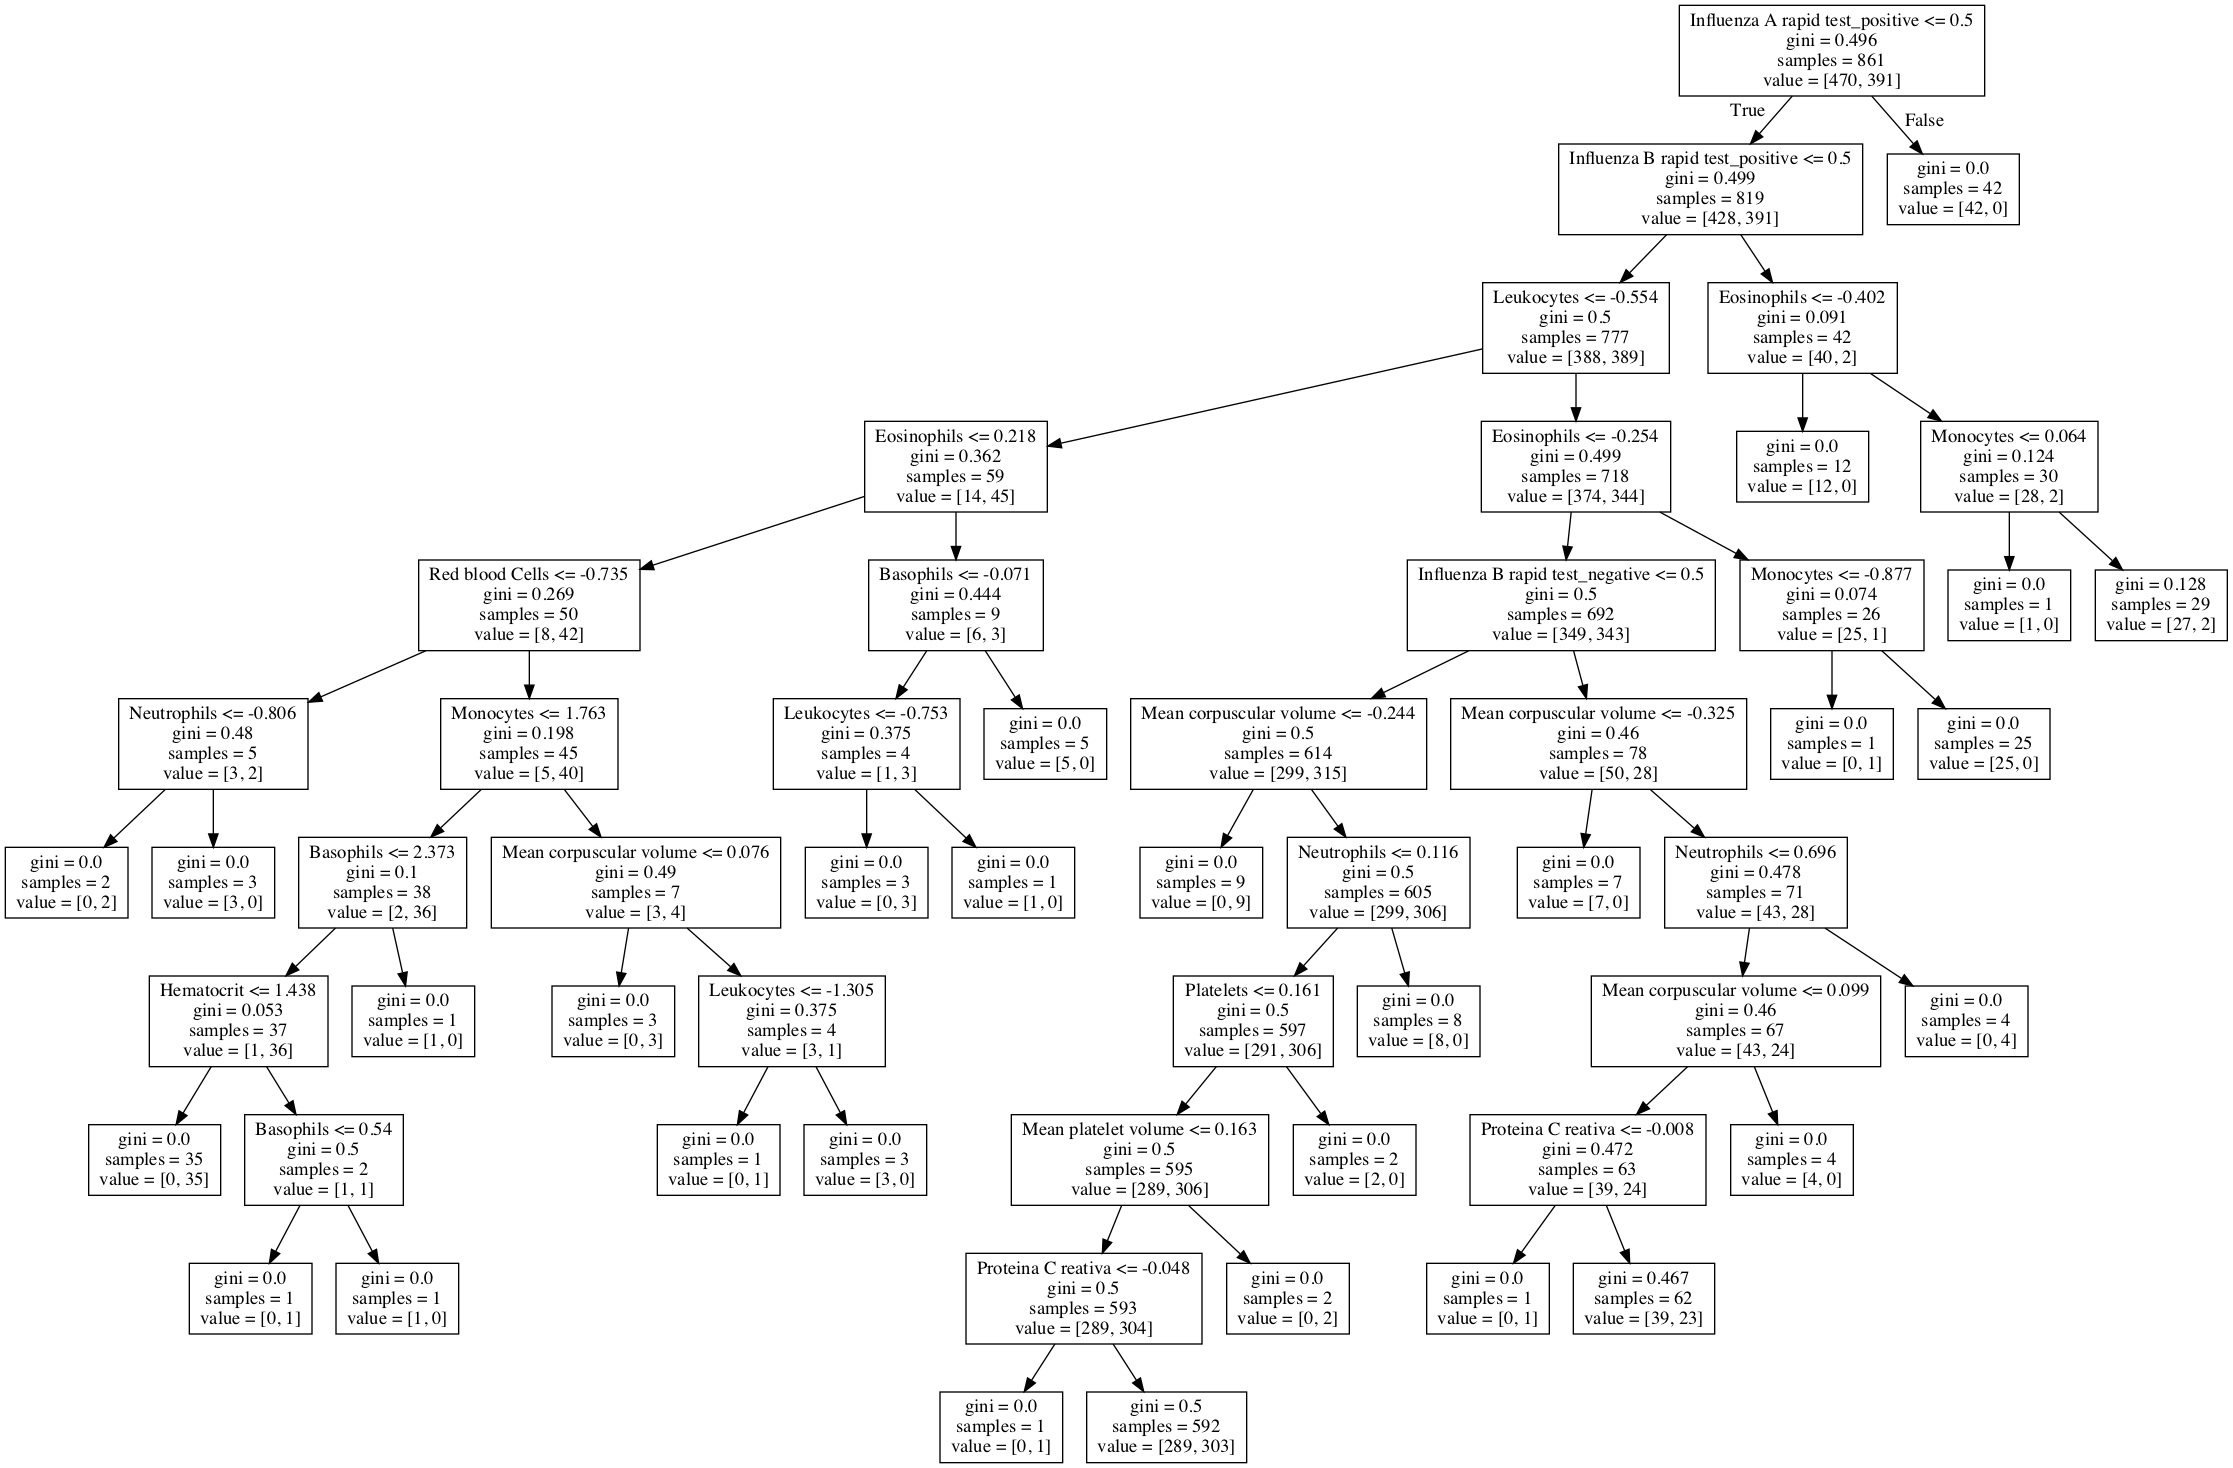

In [16]:
#display the image
from IPython.display import Image
Image(filename="dt_viz.png",width=1000,height=1000)

In [17]:
#retrain with a small max_depth limit
model_small=DecisionTreeClassifier(max_depth=3,random_state=rs)
model_small.fit(sample_fixed_train,target_train)

print("Train accuracy: ",model_small.score(sample_fixed_train,target_train))
print("Test accuracy: ",model_small.score(sample_fixed_test,target_test))

target_pred=model_small.predict(sample_fixed_test)
print(classification_report(target_test,target_pred))

Train accuracy:  0.5818815331010453
Test accuracy:  0.5663956639566395
              precision    recall  f1-score   support

           0       0.56      0.95      0.71       202
           1       0.63      0.10      0.18       167

    accuracy                           0.57       369
   macro avg       0.60      0.53      0.44       369
weighted avg       0.59      0.57      0.47       369



In [18]:
importances = model_small.feature_importances_
feature_names = sample_fixed.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])

Influenza A rapid test_positive : 0.41949224397557183
Influenza B rapid test_positive : 0.3767366575521471
Leukocytes : 0.20201609138018473
Eosinophils : 0.0017550070920963063
Influenza B rapid test_negative : 0.0
Neutrophils : 0.0
Mean platelet volume : 0.0
Monocytes : 0.0
Red blood cell distribution width : 0.0
Red blood Cells : 0.0
Platelets : 0.0
Basophils : 0.0
Hematocrit : 0.0
Influenza A rapid test_negative : 0.0
Mean corpuscular hemoglobin : 0.0
Mean corpuscular volume : 0.0
Mean corpuscular hemoglobin concentration : 0.0
Lymphocytes : 0.0
Hemoglobin : 0.0
Proteina C reativa : 0.0


In [19]:
#visualize
dotfile=StringIO()
export_graphviz(model_small,out_file=dotfile,feature_names=sample_fixed.columns)
graph=pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz_small.png")

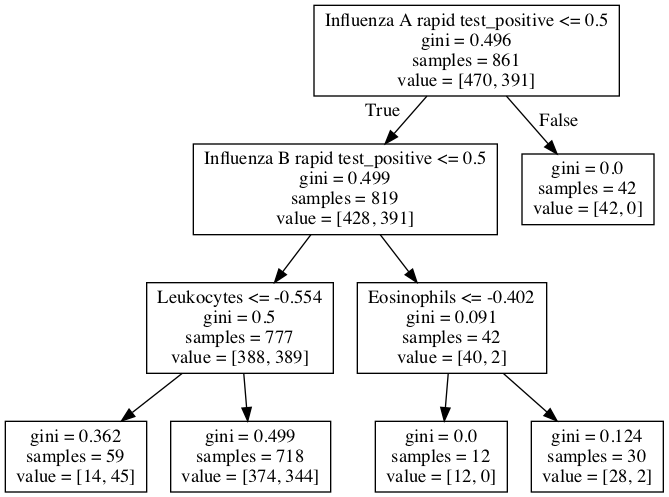

In [20]:
#display the image
from IPython.display import Image
Image(filename="dt_viz_small.png",width=1000,height=1000)

In [21]:
from sklearn.model_selection import GridSearchCV
# Grid search CV
params={'criterion':['gini','entropy'],
        'max_depth':range(1,16),
        'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1=GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), return_train_score=True,cv=10)
cv_1.fit(sample_fixed_train,target_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [22]:
result_set=cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.00288048, 0.00137806, 0.00137529, 0.00137908, 0.00160768,
       0.00214579, 0.00194793, 0.00154951, 0.00190053, 0.00177329,
       0.00183871, 0.00178664, 0.00251987, 0.00213327, 0.00205157,
       0.00202727, 0.00224538, 0.00218761, 0.00239401, 0.00201383,
       0.00231888, 0.00223763, 0.00225012, 0.00210006, 0.00237715,
       0.00246701, 0.00222807, 0.00214117, 0.00261526, 0.00236974,
       0.00234694, 0.00218139, 0.00249879, 0.00311351, 0.00320373,
       0.00296023, 0.00299954, 0.00281878, 0.00272558, 0.00270267,
       0.0045552 , 0.0036119 , 0.00293086, 0.00279841, 0.00324583,
       0.00308468, 0.00278411, 0.00335491, 0.00325186, 0.00299821,
       0.00303185, 0.00248342, 0.00252934, 0.00239415, 0.0022579 ,
       0.00215898, 0.00255737, 0.00235965, 0.00220253, 0.00213203,
       0.00144684, 0.00139742, 0.00152543, 0.00141165, 0.00172107,
       0.00174737, 0.00169034, 0.00165191, 0.00203187, 0.00214796,
       0.00191414, 0.00200651, 0.0023206 , 0

Total number of models:  120


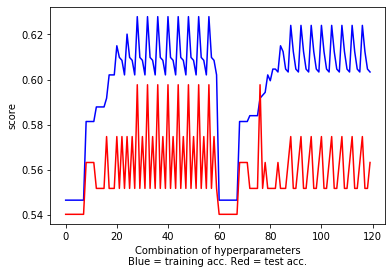

In [23]:
import matplotlib.pyplot as plt

train_result=result_set['split0_train_score']
test_result=result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0,len(train_result)),train_result,'b',range(0,len(test_result)),test_result,'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

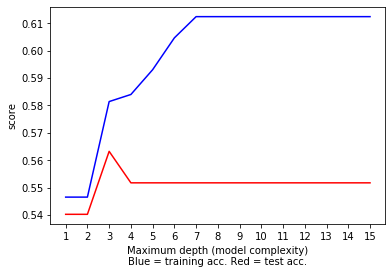

In [24]:
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

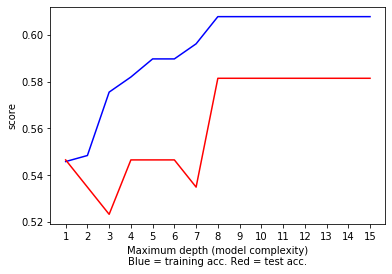

In [25]:
train_result = result_set['split1_train_score']
test_result = result_set['split1_test_score']
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [26]:
print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}


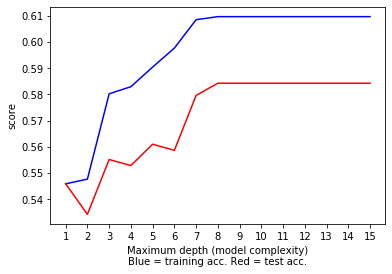

In [27]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [28]:
cv_1.fit(sample_fixed_train, target_train)

print("Train accuracy:", cv_1.score(sample_fixed_train, target_train))
print("Test accuracy:", cv_1.score(sample_fixed_test, target_test))

Train accuracy: 0.6225319396051103
Test accuracy: 0.5826558265582655


In [29]:
# inside `dm_tools.py' together with data_prep()
import numpy as np
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [30]:
# do the feature importance and visualization analysis on GridSearchCV
#from dm_tools import analyse_feature_importance, visualize_decision_tree

#analyse_feature_importance(cv_1.best_estimator_, sample_fixed.columns, 20)
#visualize_decision_tree(cv_1.best_estimator_, sample_fixed.columns, "optimal_tree.png")

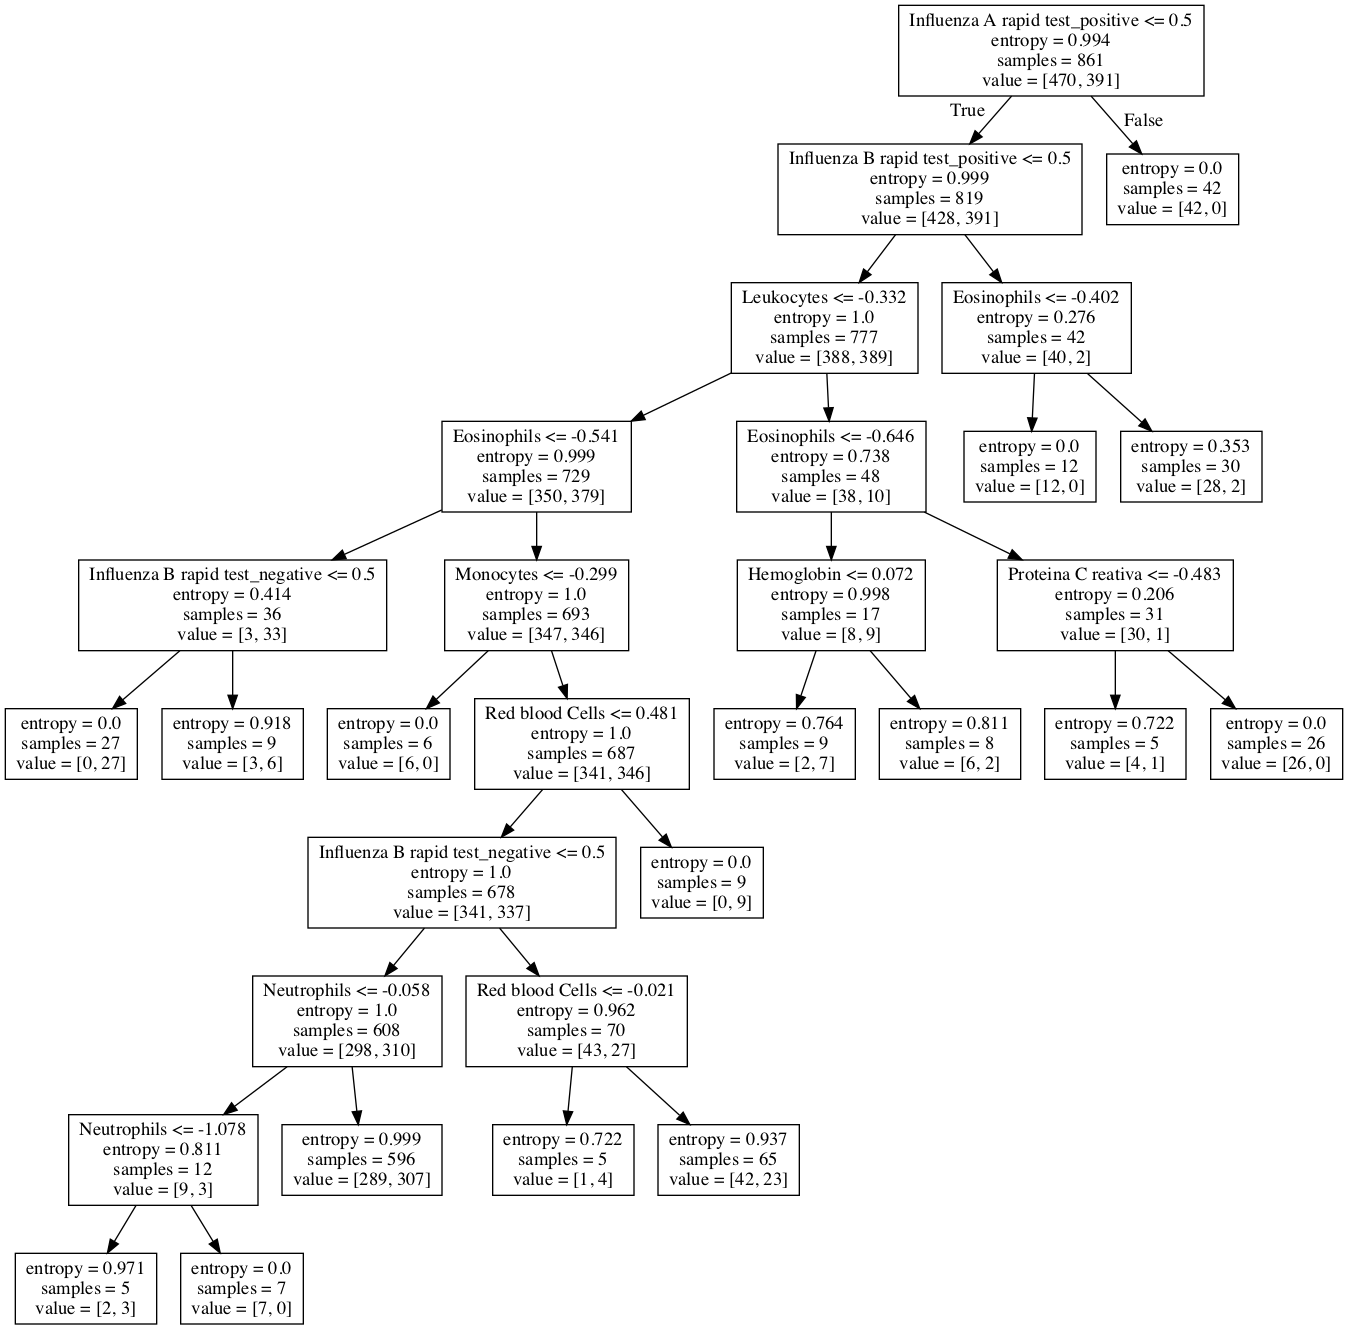

In [31]:
Image(filename="optimal_tree.png",width=1000,height=1000)

In [32]:
target_pred_dt = model.predict(sample_fixed_test)
target_pred_dt_small = model_small.predict(sample_fixed_test)
target_pred_dt_cv = cv_1.predict(sample_fixed_test)

print("Accuracy score on test for DT_default:", accuracy_score(target_test, target_pred_dt))
print("Accuracy score on test for DT_small:", accuracy_score(target_test, target_pred_dt_small))
print("Accuracy score on test for DT_optimal", accuracy_score(target_test, target_pred_dt_cv))

Accuracy score on test for DT_default: 0.5880758807588076
Accuracy score on test for DT_small: 0.5663956639566395
Accuracy score on test for DT_optimal 0.5826558265582655


In [33]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
target_pred_proba_dt = dt_cv_best.predict_proba(sample_fixed_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(target_pred_proba_dt[i][0], '\t', target_pred_proba_dt[i][1], '\t', target_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.9333333333333333 	 0.06666666666666667 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.6461538461538462 	 0.35384615384615387 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.9333333333333333 	 0.06666666666666667 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.0 	 1.0 	 1
0.0 	 1.0 	 1
0.4848993288590604 	 0.5151006711409396 	 0
0.4848993288590604 	 0.5151006711409396 	 1
1.0 	 0.0 	 0
0.4848993288590604 	 0.5151006711409396 	 0
1.0 	 0.0 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.4848993288590604 	 0.5151006711409396 	 0
0.4848993288590604 	 0.5151006711409396 	 0


In [34]:
from sklearn.metrics import roc_auc_score

target_pred_proba_dt = model.predict_proba(sample_fixed_test)
target_pred_proba_dt_small = model_small.predict_proba(sample_fixed_test)
target_pred_proba_dt_cv = dt_cv_best.predict_proba(sample_fixed_test)

roc_index_dt = roc_auc_score(target_test, target_pred_proba_dt[:, 1])
roc_index_dt_small = roc_auc_score(target_test, target_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(target_test, target_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_small:", roc_index_dt_small)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.6296762909823916
ROC index on test for DT_small: 0.6061836722594416
ROC index on test for DT_optimal: 0.6233177209936562


In [35]:
from sklearn.metrics import roc_curve


fpr_dt, tpr_dt, thresholds_dt = roc_curve(target_test, target_pred_proba_dt[:,1])
fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(target_test, target_pred_proba_dt_small[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(target_test, target_pred_proba_dt_cv[:,1])

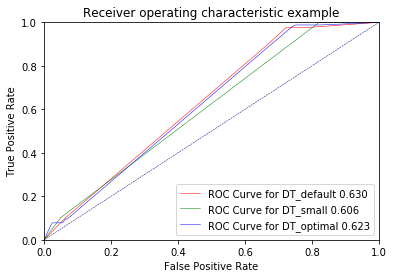

In [36]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_small, tpr_dt_small, label='ROC Curve for DT_small {:.3f}'.format(roc_index_dt_small), color='green', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
import pickle
dt_best = model
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt, fpr_dt, tpr_dt], f)